# Words Embedding Example

## Setup

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

### Input Text

In [2]:
with open("text.txt", "r", encoding="utf-8") as fd:
    text = fd.read()

In [3]:
print("Length in characters: ", len(text))
print(text)
chars = sorted(list(set(text)))
print(f"{len(chars)} unique characters:")
print("".join(chars))

Length in characters:  2907
The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first 

## Text Pre-Processing

### Text Tokenization

In [4]:
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [5]:
tokens = tokenize(text)
print(tokens)
print(len(tokens))  # 457 tokens in total
print(len(set(tokens)))  # 225 unique tokens

['the', 'orbiter', 'discovery', 'ov', 'is', 'considered', 'eligible', 'for', 'listing', 'in', 'the', 'national', 'register', 'of', 'historic', 'places', 'nrhp', 'in', 'the', 'context', 'of', 'the', 'u', 's', 'space', 'shuttle', 'program', 'under', 'criterion', 'a', 'in', 'the', 'areas', 'of', 'space', 'exploration', 'and', 'transportation', 'and', 'under', 'criterion', 'c', 'in', 'the', 'area', 'of', 'engineering', 'because', 'it', 'has', 'achieved', 'significance', 'within', 'the', 'past', 'fifty', 'years', 'criteria', 'consideration', 'g', 'applies', 'under', 'criterion', 'a', 'discovery', 'is', 'significant', 'as', 'the', 'oldest', 'of', 'the', 'three', 'extant', 'orbiter', 'vehicles', 'constructed', 'for', 'the', 'space', 'shuttle', 'program', 'ssp', 'the', 'longest', 'running', 'american', 'space', 'program', 'to', 'date', 'she', 'was', 'the', 'third', 'of', 'five', 'orbiters', 'built', 'by', 'nasa', 'unlike', 'the', 'mercury', 'gemini', 'and', 'apollo', 'programs', 'the', 'ssp', 

### Mapping of Tokens

In [6]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [7]:
word_to_id, id_to_word = mapping(tokens)
print(word_to_id)
print(id_to_word)
len(word_to_id)

{'significance': 0, 'listing': 1, 'fly': 2, 'srbs': 3, 'criteria': 4, 'servicing': 5, 'places': 6, 'and': 7, 'three': 8, 'american': 9, 'times': 10, 'missions': 11, 'space': 12, 'in': 13, 'represents': 14, 'international': 15, 'dock': 16, 'spacecraft': 17, 'orbit': 18, 'cargo': 19, 'sound': 20, 'accidents': 21, 'leap': 22, 'context': 23, 'to': 24, 'structure': 25, 'previous': 26, 'orbital': 27, 'transportation': 28, 'extant': 29, 'seven': 30, 'use': 31, 'remains': 32, 'flown': 33, 'voyage': 34, 'had': 35, 'fastest': 36, 'return': 37, 'integrated': 38, 'crew': 39, 'defense': 40, 'tps': 41, 'provided': 42, 'the': 43, 'followed': 44, 'base': 45, 'ii': 46, 'station': 47, 'which': 48, 'national': 49, 's': 50, 'launched': 51, 'was': 52, 'performed': 53, 'iss': 54, 'technological': 55, 'considered': 56, 'carrying': 57, 'than': 58, 'both': 59, 'carried': 60, 'criterion': 61, 'gemini': 62, 'fault': 63, 'with': 64, 'chosen': 65, 'oldest': 66, 'used': 67, 'nrhp': 68, 'apollo': 69, 'years': 70, 'a

225

### Training Data Generation

In [8]:
def concat(*iterables):  # make a generator from 1 or more iterable objects, like a list
    for iterable in iterables:
        yield from iterable

In [9]:
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [10]:
def generate_training_data(tokens, word_to_id, context_window=2):
    X = []
    y = []
    n_tokens = len(tokens)  # length of dictionary for one hot encoding

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - context_window), i),
            range(i, min(n_tokens, i + context_window + 1)),
        )  # idx #0: [0, 1, 2]; idx #1: [0, 1, 2, 3]; idx #2: [0, 1, 2, 3, 4]; idx #3: [1, 2, 3, 4, 5]

        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

    return np.asarray(X), np.asarray(y)

In [11]:
X, y = generate_training_data(tokens, word_to_id)

In [12]:
# one hot encoded token "the", it's #49 in the word_to_id list and #0 in the tokens list
print(X[0], "<> id:", list(X[0]).index(1), "<> word:", id_to_word[list(X[0]).index(1)])
# one hot encoded token "orbiter" that pairs with "the" in the same context window "The Orbiter Discovery..."
print(y[0], "<> id:", list(y[0]).index(1), "<> word:", id_to_word[list(y[0]).index(1)])
# 1822 - number of pairs of words that can be in the same context window, 225 - the length of word_to_id list
print(X.shape, y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] <> id: 43 <> word: the
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] <> id: 141 <> word: orbiter
(1822, 225) (1822, 225)


## Model Construction

### Softmax Activation Function

In [13]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

### Random Initialization of the Model

In [14]:
def init_network(vocab_size, n_embedding=10):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size),
    }
    return model

In [15]:
model = init_network(len(word_to_id))

### Forward Single Propagation

In [16]:
def forward(model, X, return_cache=True):
    cache = {}

    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])

    if not return_cache:
        return cache["z"]
    return cache

### Backward Propagation

In [17]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

In [18]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

### Get Word Embeddings

In [19]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

## Model Training

In [20]:
n_iter = 200
learning_rate = 0.01

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

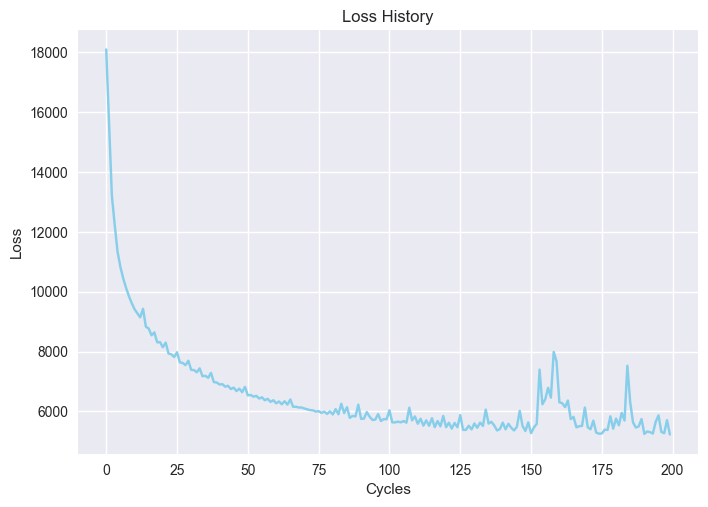

In [21]:
plt.style.use("seaborn-v0_8")

plt.plot(range(len(history)), history, color="skyblue")
plt.title("Loss History")
plt.xlabel("Cycles")
plt.ylabel("Loss")
plt.show()

### Embedding Example

In [22]:
print(get_embedding(model, "orbiter"))

[-0.75520607  0.83618476  0.32479676  0.00859846 -0.75395432 -0.44542783
 -0.45758234  0.53828957 -0.8263322  -1.03309227]
